<a href="https://colab.research.google.com/github/BbangB/Code/blob/main/DNN_Fashion_mnist_Classification_using_Regularization%2C_Dropout%2C_BatchNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST - Categorical Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Fashion MNIST Data_Set Load & Review

> ## 1) Load Fashion MNIST Data_Set

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


* Train_Data Information

In [3]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[9 0 0 3 0]


* Test_Data Information

In [4]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

X_test

10000
(10000, 28, 28)
10000
[9 2 1 1 6]


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

> ## 2) Visualization

<function matplotlib.pyplot.show>

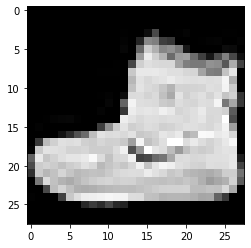

In [5]:
import matplotlib.pyplot as plt

digit = X_train[0]
plt.imshow(digit, cmap = 'gray')
plt.show

In [6]:
import numpy as np

np.set_printoptions(linewidth= 150)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (60000, 28, 28) to (60000, 784)

In [7]:
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000,28*28))
X_train , X_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

* Normalization

In [8]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255


In [9]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

> ## 2) One Hot Encoding

In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [11]:
print(y_train[:5])


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# III. Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes

In [55]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(256, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00001),  input_shape = (28 * 28,)))
mnist.add(Dropout(0.5))
mnist.add(BatchNormalization())
mnist.add(layers.Dense(10, activation = 'softmax'))


* 모델 구조 확인

In [56]:
mnist.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 204,554
Trainable params: 204,042
Non-trainable params: 512
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [57]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 3분

In [58]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 0.6037 - accuracy: 0.7892 - val_loss: 0.4682 - val_accuracy: 0.8353
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4701 - accuracy: 0.8348 - val_loss: 0.4194 - val_accuracy: 0.8516
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4426 - accuracy: 0.8436 - val_loss: 0.4018 - val_accuracy: 0.8561
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4263 - accuracy: 0.8499 - val_loss: 0.3763 - val_accuracy: 0.8668
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4109 - accuracy: 0.8533 - val_loss: 0.3852 - val_accuracy: 0.8640
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4075 - accuracy: 0.8547 - val_loss: 0.3795 - val_accuracy: 0.8660
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4049 - accuracy: 0.8589 - val_loss: 0.3863 - val_accuracy: 0.8612

> ## 4) 학습 결과 시각화

* Loss Visualization

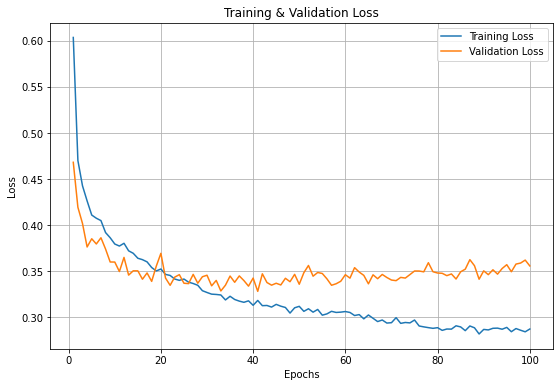

In [59]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [60]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.3923 - accuracy: 0.8837
Loss = 0.39228
Accuracy = 0.88370


> ## 6) Model Predict

* Probability

In [61]:
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(X_test[:1,:]))

[[0.          0.000000001 0.          0.          0.          0.000220812 0.          0.0000745   0.          0.99970466 ]]


* Class

In [62]:
print(np.argmax(mnist.predict(X_test[:1,:]), axis = 1))

[9]


# 
# 
# 
# The End
# 
# 
# 

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
